# Diskrete Verteilungen

Es seien $X$ und $Y$ zwei diskrete Zufallsvariablen mit möglichen Werten $0, 1, \ldots, K$. Die Wahrscheinlichkeitsmassenfunktionen (probability mass function, PMF) $p_X(x)$ und $p_Y(y)$ weisen jedem möglichen Ergebnis eine Wahrscheinlichkeit zu.

Zum Beispiel:

$$
p_X(x) = \begin{cases}
0.250 & \text{for } x = 0\\
0.095 & \text{for } x = 1 \\
0.272 & \text{for } x = 2 \\
0.383 & \text{for } x = 3 \\
0 & \text{otherwise}
\end{cases}
$$

$$
p_Y(y) = \begin{cases}
0.76 & \text{for } y = 2\\
0.24 & \text{for } y = 3 \\
0 & \text{otherwise}
\end{cases}
$$

Die PMF von $X$ und $Y$ sind in den DataFrames `px` und `py` gespeichert.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

px = pd.read_csv('https://raw.githubusercontent.com/febse/data/main/econ/prob_review/px.csv')
py = pd.read_csv('https://raw.githubusercontent.com/febse/data/main/econ/prob_review/py.csv')
pxy = pd.read_csv('https://raw.githubusercontent.com/febse/data/main/econ/prob_review/pxy.csv')

pxy = pxy[["x", "y", "p"]]

In [2]:
#| label: tbl-distr-x
#| tbl-cap: "Die PMF $Y$"

px

,x,p
0,0,0.250
1,1,0.095
2,2,0.272
3,3,0.383


In [3]:
#| label: tbl-distr-y
#| tbl-cap: "Die PMF von $Y$"

py

,y,p
0,2,0.76
1,3,0.24


<Axes: xlabel='x', ylabel='p'>

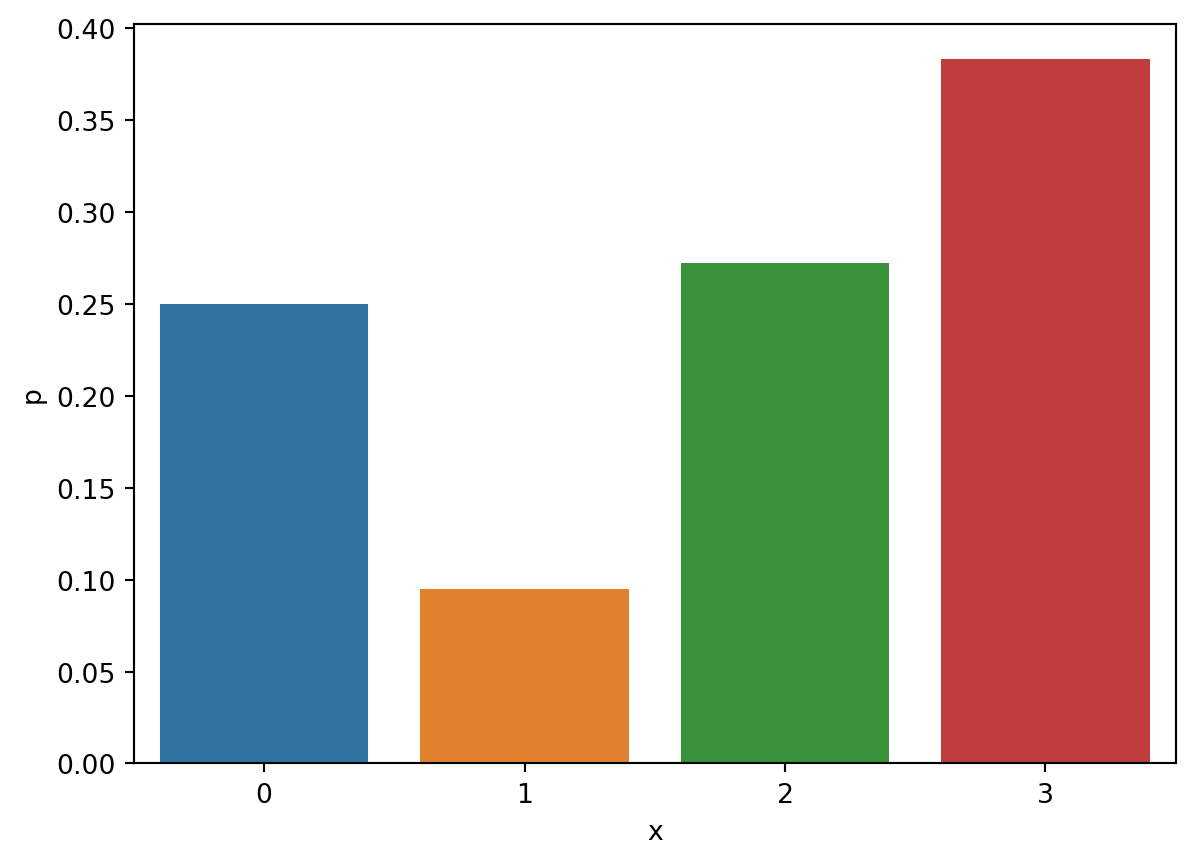

In [4]:
#| label: fig-distr-x
#| fig-cap: "Die PMF von $X$"

sns.barplot(x='x', y='p', data=px)

Die PFM besitzen die Eigenschaft, dass die Summe über alle möglichen Werte eins ergibt:

$$
\sum_{x = 0}^{3}p_X(x) = 0.250 + 0.095 + 0.272 + 0.383 = 1
$$

::: {#exr-prob-y}
## PMF

Benutzen die die Funktion `sum` aus der NumPy-Bibliothek, um zu zeigen, dass sich die PMF von $Y$ zu eins summiert. Die Wahrscheinlichkeiten befinden sich in der Spalte `p` des DataFrames `py`.



## Sampling from a univariate distribution

Im Folgenden werden wir die Funktion `choice` aus der NumPy-Bibliothek verwenden, um eine Stichprobe von 10,000 Beobachtungen aus der Verteilung von $X$ zu ziehen.

In [6]:
# Das erste Argument sind die möglichen Werte
# Das zweite Argument (p) sind die Wahrscheinlichkeiten
# Das dritte Argument (size) ist die Anzahl der Zufallszahlen

smpl_x = np.random.choice(px["x"], p = px["p"], size = 10000)

# Wir können uns die ersten 10 Zufallszahlen anschauen
smpl_x[0:10]

array([3, 3, 0, 0, 2, 2, 3, 3, 3, 3])

Wir können die absoluten Häufigkeiten (Anzahl) der Werte zählen

In [7]:
pd.value_counts(smpl_x)

/tmp/ipykernel_60146/1849734910.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



3    3812
2    2737
0    2504
1     947
Name: count, dtype: int64

und die relative Häufigkeit berechnen, indem wir die Anzahl durch die Gesamtzahl der Beobachtungen teilen.

In [8]:
pd.value_counts(smpl_x, normalize=True)

/tmp/ipykernel_60146/979932776.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



3    0.3812
2    0.2737
0    0.2504
1    0.0947
Name: proportion, dtype: float64

<Axes: ylabel='count'>

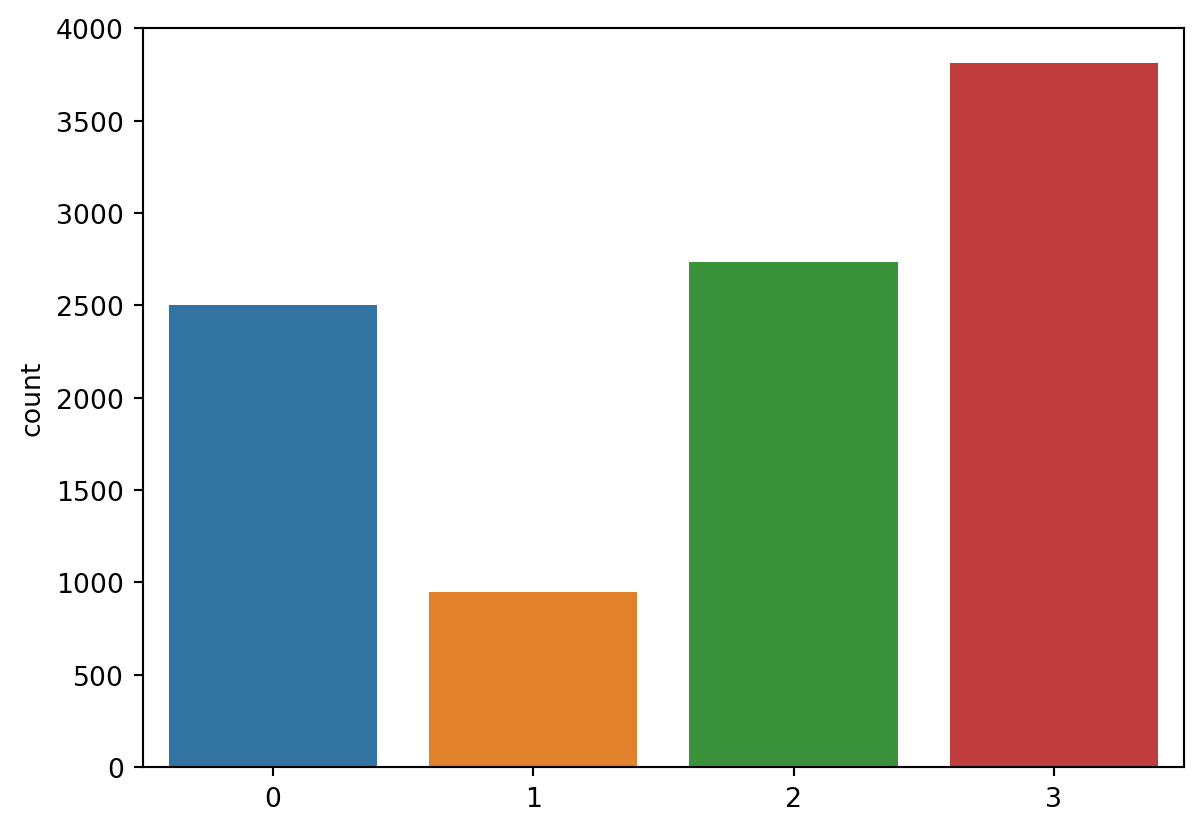

In [9]:
sns.countplot(x = smpl_x)


::: {#exr-prob-y-sample}
## Sampling from the Distribution of Y

Ziehen Sie eine Stichprobe von 10,000 Beobachtungen aus der Verteilung von $Y$ und berechnen Sie die absoluten und die relativen Häufigkeiten der Werte und visualisieren Sie die Häufigkeiten mit einem Balkendiagramm.
:::

In [10]:
# Benutzen Sie den Code aus der vorherigen Zelle, um eine Stichprobe von $Y$ zu ziehen. Achten Sie
# darauf, dass die Spalte mit den möglichen Werten von $Y$ "y" heißt.



In [11]:
# Die absoluten Häufigkeiten


In [12]:
# Die relativen Häufigkeiten


In [13]:
# Das Balkendiagramm



## Der Erwartungswert

Der Erwartungswert einer Zufallsvariablen (Verteilung) ist der gewichtete Durchschnitt aller möglichen Werte, die auftreten können. Die Gewichte sind die Wahrscheinlichkeiten, mit denen die Werte auftreten. Der Erwartungswert ist ein Maß für die *Lage* der Verteilung.

$$
\begin{align}
\mu_x & = E(X) = \sum_{x = 0}^{3} x p_X(x) = 0 \times 0.250 + 1 \times 0.095 + 2 \times 0.272 + 3 \times 0.383 = 1.788 \\
\end{align}
$$

In [14]:
x_expected_value = np.sum(px["x"] * px["p"])
x_expected_value

1.788

In [15]:
np.mean(smpl_x)

1.7857

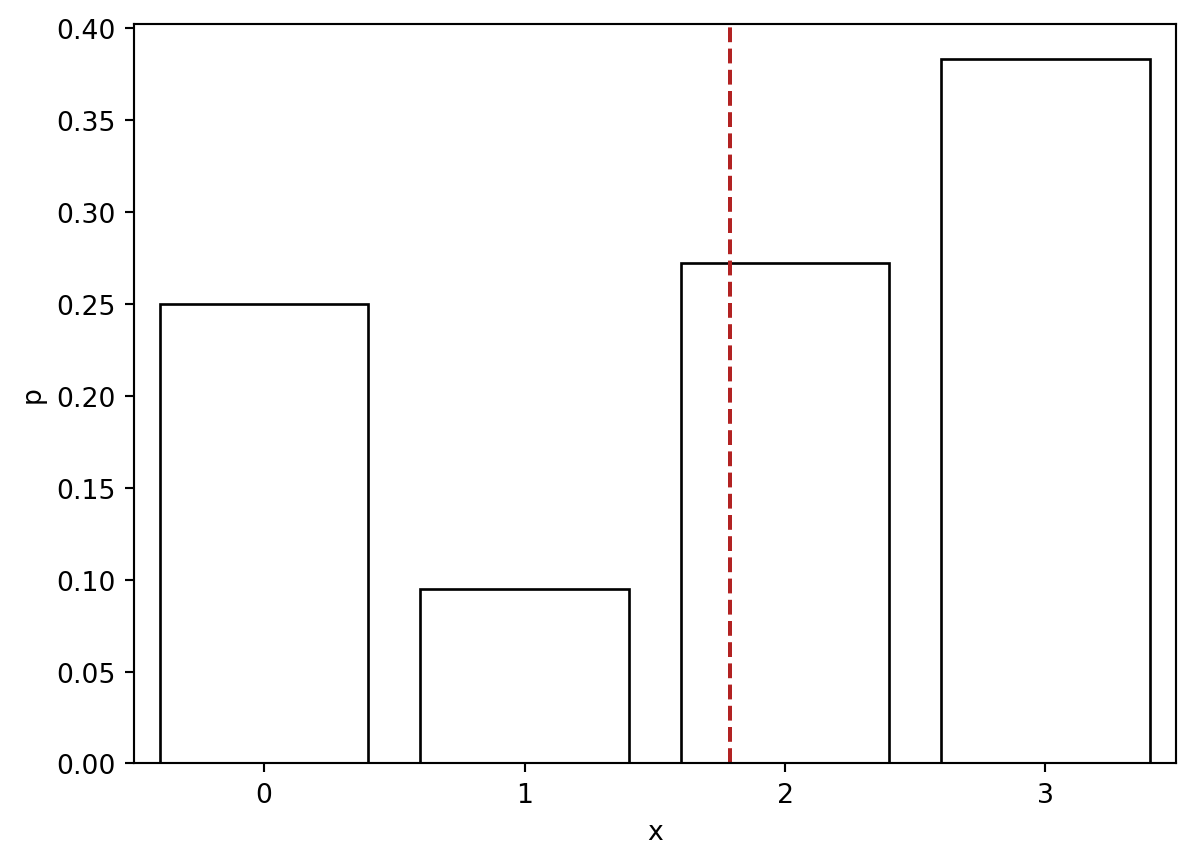

In [16]:
fig, ax = plt.subplots()

sns.barplot(x='x', y='p', data=px, ax = ax, fill = False)
ax.axvline(x = x_expected_value, color = "firebrick", linestyle = "--")


::: {#exr-expectation}
## Erwartungswert

Berechnen Sie den Erwartungswert von $Y$.
:::


Der Erwartungswert ist die beste Vorhersage für zukünftige Werte einer Zufallsvariablen, in dem Sinne, dass er den erwarteten Wert der quadratischen Verlustfunktion minimiert:

$$
E[(X - \hat{x})^2]
$$

Lassen Sie uns ein Beispiel konstruieren. Sie müssen das Ergebnis von $X$ vorhersagen und Sie denken, dass die beste Vorhersage $\bar{x} = 1$ ist. Wenn das Spiel läuft, wird es vier mögliche Werte produzieren: 0, 1, 2 und 3. Die Fehler, den Sie machen werden, sind:

$$
L(x) = (x - 1)^2 =
\begin{cases}
   (0 - 1)^2 = 1 & \text{x = 0}\\
   (1 - 1)^2 = 0 & \text{x = 1}\\
   (2 - 1)^2 = 1 & \text{x = 2}\\
   (3 - 1)^2 = 4 & \text{x = 3}
\end{cases}
$$

::: {#exr-expected-loss}
## Erwarteter Verlust

Berechnen Sie den erwarteten Verlust für eine Vorhersage von $\bar{x} = 1.5$.

:::

In [18]:
# Berechnen Sie zuerst die Fehler

# errors = ... - 1.5
# errors

In [19]:
# Danach quadrieren Sie die Fehler
## squared_errors = ...**2

In [20]:
# Zuletzt multiplizieren Sie die quadrierten Fehler mit den Wahrscheinlichkeiten und summieren Sie

# np.sum(... * ...)

## Die Varianz

Die Varianz einer Zufallsvariablen (Verteilung) misst, wie unterschiedlich die möglichen Werte sind, die auftreten können. Werte, die unter $p_X$ häufiger auftreten (eine höhere Wahrscheinlichkeit haben), erhalten ein höheres Gewicht. Werte, die unter $p_X$ seltener auftreten, erhalten ein geringeres Gewicht in der Summe.

:::{#def-variance}
## Varianz

Die Varianz ist als die erwartete quadratische Abweichung von dem Erwartungswert definiert

$$
Var(X) = E\left( (X - E(X))^2\right)
$$

Für diskrete Verteilungen ist diese Erwartung einfach der gewichtete (mit den Wahrscheinlichkeiten) Durchschnitt der quadrierten Abweichungen vom Erwartungswert.
:::

In unserem Beispiel ist die Varianz von $X$:

$$
Var(X) = \sum_{x = 0}^{3} (x - \mu_x)^2 \times p_X(x)
$$

$$
\begin{align}
Var(X) & = \sum_{x = 0}^{3} (x - \mu_x)^2 \times p_X(x) \\
       & = (0 - 1.788)^2 \times 0.250 + (1 - 1.788)^2 \times 0.095 + (2 - 1.788)^2\times 0.272 + (3 - 1.788)^2 \times 0.383 \\
       & = (-1.788)^2 \times 0.250 + (-0.788)^2 \times 0.095 + (0.212)^2\times 0.272 + (1.212)^2 \times 0.383 \\
       & = 3.196 \times 0.250 + 0.620^2 \times 0.095 + 0.044 \times 0.272 + 1.468 \times 0.383 \\
       & \approx 1.433
\end{align}
$$ {#eq-variance}


In [21]:
np.sum(((px["x"] - x_expected_value)**2) * px["p"])

1.433056

::: {#thm-exp-value-props}
## Eigenschaften des Erwartungswertes

Es sei $X$ eine Zufallsvariable mit Erwartungswert $E(X)$, $Y$ eine Zufallsvariable mit Erwartungswert $E(Y)$ und $a$ eine feste Konstante ($a \in \mathbb{R}$). Man kann zeigen, dass die folgenden Eigenschaften gelten:

$$
\begin{align}
E(a) & = a \\
E(aX) & = aE(X) \\
E(X + Y) & = E(X) + E(Y)
\end{align}
$$

Ferner, wenn $X$ und $Y$ *unkorreliert* sind, dann ist der Erwartungswert des Produkts der beiden Zufallsvariablen gleich dem Produkt ihrer Erwartungswerte:

$$
E(XY) = E(X)E(Y)
$$
:::

::: {.callout-note collapse="true"}
## Proof of the Properties of the Expectation

1.  $E(a) = a$

The expected value of a discrete variable $X$ with possible outcomes $x_1, x_2, \ldots, x_n$ and probabilities $p_1, p_2, \ldots, p_n$ is given by

$$
E(X) = \sum_{i = 1}^{n} x_i p_i
$$

Multiplying both sides by $a$ gives

$$
aE(X) = a\sum_{i = 1}^{n} x_i p_i = \sum_{i = 1}^{n} ax_i p_i
$$

The right-hand side is the expected value of a random variable that takes the values $ax_1, ax_2, \ldots, ax_n$ with probabilities $p_1, p_2, \ldots, p_n$. Therefore, $E(aX) = aE(X)$.

2.  $E(X + Y) = E(X) + E(Y)$

This proof involves the joint distribution function of $X$ and $Y$ which we will introduce later. The proof is based on the linearity of the expected value operator.
:::

::: {#thm-variance-short}
## Eigenschaften der Varianz

Es sei $X$ eine Zufallsvariable mit Erwartungswert $E(X)$, $Y$ eine Zufallsvariable mit Erwartungswert $E(Y)$ und $a$ eine feste Konstante ($a \in \mathbb{R}$). Man kann zeigen, dass die folgenden Eigenschaften gelten:

$$
Var(X) = E(X^2) - E(X)^2
$$

$$
\begin{align}
Var(a) & = 0 \\
Var(aX) & = a^2 Var(X)
\end{align}
$$

Falls $X$ und $Y$ *unkorreliert* sind, dann ist die Varianz der Summe der beiden Zufallsvariablen gleich der Summe ihrer Varianzen:

$$
Var(X + Y) = Var(X) + Var(Y)
$$
:::

::: {#exr-sum}
## Erwartungswert und Varianz

Benutzen Sie die 
Use the distributions of $X$ and $Y$ from @tbl-distr-x and @tbl-distr-y to compute the expected value and the variance of

$$
2X + 3Y + 1.
$$

Assume that $X$ and $Y$ are independent.
:::

::: solution
$$
E(2X + 3Y + 1) = \\
Var(2X + 3Y + 1) = 
$$
:::

## Die gemeinsame Verteilung


Die gemeinsame Wahrscheinlichkeitsmassenfunktion gibt die Wahrscheinlichkeit des *gleichzeitigen* Auftretens von $x$ und $y$ an. Zum Beispiel können Sie die Frage stellen: Was ist die Wahrscheinlichkeit von $x = 2$ *und* $y = 3$.

Für zwei diskrete Zufallsvariablen ist es bequem, die PMF als eine Tabelle darzustellen. Der DataFrame `pxy` enthält eine Verteilung von $X$ und $Y$.

In [22]:
pxy

,x,y,p
0,0,2,0.241
1,0,3,0.009
2,1,2,0.089
3,1,3,0.006
4,2,2,0.229
5,2,3,0.043
6,3,2,0.201
7,3,3,0.182


Manchmal ist es allerdings einfacher, die gemeinsame Verteilung in einer Matrix zu visualisieren. Die Matrix wird als *Kreuztabelle* bezeichnet. Die Zeilen entsprechen den möglichen Werten von $X$ und die Spalten den möglichen Werten von $Y$. Die Zellen enthalten die Wahrscheinlichkeiten.

In [23]:
#| label: tbl-distr-dep
#| tbl-cap: "Joint distribution of $X$ and $Y$."

pxy.pivot(index = "x", columns = "y", values = "p")

y,2,3
x,,
0,0.241,0.009
1,0.089,0.006
2,0.229,0.043
3,0.201,0.182


$$
p_{XY}(x=2, y=3) = 0.043
$$

Wie in dem eindimensionalen Fall, müssen sich die Wahrscheinlichkeiten zu eins summieren.

$$
\sum_{x = 0}^{3}\sum_{y = 2}^{3} p_{XY}(x, y) = 1
$$

In [24]:
np.sum(pxy["p"])

1.0

## Randverteilungen

Aus der gemeinsamen PMF können wir die Randverteilungen von $X$ und $Y$ ableiten.

$$
p_X(x) = \sum_{y} p_{XY}(x, y)
$$

In [25]:
pxy.groupby("x")["p"].sum()

x
0    0.250
1    0.095
2    0.272
3    0.383
Name: p, dtype: float64

:::{#exr-marginal}
## Randverteilungen

Berechnen Sie die Randverteilungen von $X$ und $Y$ aus der gemeinsamen Verteilung $p_{XY}$.
:::

In [26]:
# pxy.groupby(...)[...].sum()


## Bedingte Verteilungen

In [27]:
#| label: tbl-cond-distr-y-dep-x
#| tbl-cap: "Conditional distributions of $Y$ given $X$"
#| code-fold: true

pxy["p_y_given_x"] = pxy["p"] / pxy.groupby("x")["p"].transform("sum")

pxy.pivot(index = "x", columns = "y", values = "p_y_given_x")

y,2,3
x,,
0,0.964000,0.036000
1,0.936842,0.063158
2,0.841912,0.158088
3,0.524804,0.475196


Die bedingte Verteilung von $Y$ gegeben $X$ ist die Wahrscheinlichkeitsverteilung von $Y$ unter der Bedingung, dass $X$ einen bestimmten Wert annimmt. Die bedingte Verteilung wird als $p_{Y|X}(y | x)$ geschrieben.

## Unabhängigkeit

Zwei Zufallsvariablen sind unabhängig, wenn das Ergebnis einer der Variablen die Wahrscheinlichkeitsverteilung der anderen nicht beeinflusst. Stellen Sie sich vor, Sie haben zwei Lottoscheine: einen von einer Lotterie in Deutschland und einen von einer Lotterie in Bulgarien. Es wäre sicher anzunehmen, dass die realisierten Gewinne der deutschen Lotterie die Gewinnchancen des bulgarischen Tickets nicht beeinflussen.

Betrachten wir nun den Fall von *abhängigen* Zufallsvariablen. Sei $X$ der Pegel eines Flusses (an einer Messstelle) zur Zeit $t$ und $Y$ der Pegel des gleichen Flusses fünf Minuten später. Es wäre sicher anzunehmen, dass wenn der Pegel des Flusses bei $t$ hoch war, dies die Verteilung des Niveaus des Flusses bei $t$ plus fünf Minuten beeinflussen würde.

:::{#def-independence}
## Unabhängigkeit

Zwei Zufallsvariablen $X$ und $Y$ sind unabhängig, wenn die gemeinsame PMF gleich dem Produkt der Randverteilungen ist.

$$
p_{XY}(x, y) = p_X(x)p_Y(y)
$$


:::

### Bedingte Verteilungen unter Unabhängigkeit

Wir können die gemeinsame Verteilung $p_{XY}(x, y)$ unter der Annahme der Unabhängigkeit von $X$ und $Y$ konstruieren, indem Wir für jede mögliche Kombination von $X$ und $Y$ das Produkt der Randverteilungen berechnen.

$$
p_{XY}(x, y) = p_X(x)p_Y(y)
$$

In [28]:
#| code-fold: true

pxy['p_x'] = pxy.groupby('x')['p'].transform('sum')
pxy['p_y'] = pxy.groupby('y')['p'].transform('sum')

pxy['p_xy_ind'] = pxy['p_x'] * pxy['p_y']

pxy.pivot(index = "x", columns = "y", values = "p_xy_ind")

y,2,3
x,,
0,0.19000,0.06000
1,0.07220,0.02280
2,0.20672,0.06528
3,0.29108,0.09192


Nun schauen wir uns die bedingte Verteilung von $Y$ gegeben $X$ an. Die bedingte Verteilung von $Y$ gegeben $X$ unter der Annahme der Unabhängigkeit ist gleich der Randverteilung von $Y$.

In [29]:
#| label: tbl-distr-indep
#| tbl-cap: "Joint distribution of $X$ and $Y$ under independence."
#| code-fold: true

pxy["p_y_given_x_ind"] = pxy["p_xy_ind"] / pxy.groupby("x")["p_xy_ind"].transform("sum")
pxy.pivot(index = "x", columns = "y", values = "p_y_given_x_ind")

y,2,3
x,,
0,0.76,0.24
1,0.76,0.24
2,0.76,0.24
3,0.76,0.24


## Der bedingte Erwartungswert

Wir haben gesehen, wie wir die bedingten Verteilungen von $Y$ gegeben $X$ im vorherigen Abschnitt hergeleitet haben. Nun können wir die Frage stellen: Was ist der Erwartungswert von $Y$, wenn $X$ bereits den Wert 0 angenommen hat (zum Beispiel). Wir können die bedingte Verteilung von $Y$ gegeben $X = 0$ nehmen und den Erwartungswert dieser Verteilung berechnen.

Für die unabhängige gemeinsame Verteilung in @tbl-distr-indep ist der bedingte Erwartungswert von $Y$ gegeben $X = 0$:

$$
E(Y | X=0) = \sum_{y = 2}^{3} y p_{Y|X=0}(y) = 2 \times 0.76 + 3 \times 0.24 = 2.24
$$

Für die abhängige gemeinsame Verteilung in @tbl-distr-dep ist der bedingte Erwartungswert von $Y$ gegeben $X = 0$:

$$
E(Y | X=0) = \sum_{y = 2}^{3} y p_{Y|X=0}(y) = 2 \times 0.964 + 3 \times 0.036 = 2.036
$$

```{r}
2 * 0.964 + 3 * 0.036
```

Wir können den bedingten Erwartungswert von $Y$ für jeden möglichen Wert von $X$ berechnen.

$$
E(Y | X = x) = \begin{cases}
  2.036 & \text{for } x = 0 \\
  2.060 & \text{for } x = 1 \\
  2.158 & \text{for } x = 2 \\
  2.475 & \text{for } x = 3
\end{cases}
$$

In [30]:
#| label: tbl-cond-exp-y-ind
#| tbl-cap: "Bedingte Erwartungswerte von $Y$ für alle mögliche Werte von $X$ unter Unabhängigkeit."
#| code-fold: true

pxy.groupby("x").apply(lambda x: np.sum(x["p_y_given_x_ind"] * x["y"]))

x
0    2.24
1    2.24
2    2.24
3    2.24
dtype: float64

In [31]:
#| label: tbl-cond-exp-y
#| tbl-cap: "Bedingte Erwartungswerte von $Y$ für alle mögliche Werte von $X$ unter Abhängigkeit."
#| code-fold: true

pxy.groupby("x").apply(lambda x: np.sum(x["p_y_given_x"] * x["y"]))

x
0    2.036000
1    2.063158
2    2.158088
3    2.475196
dtype: float64

Im Fall der abhängigen Variablen ist der bedingte Erwartungswert von $Y$ gegeben $X$ nicht konstant, sondern variiert mit $X$.